In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
from scipy.linalg import eigh_tridiagonal

In [11]:
"""
This module is an implementation for solving the time-independent Schrödinger equation.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
from scipy.linalg import eigh_tridiagonal

BOHR_RADII = scipy.constants.physical_constants['Bohr radius'][0]
COLORS = ['g', 'b', 'r', 'c']

def schrodinger(
        potential: np.ndarray,
        dx: float
    ) -> tuple[np.ndarray]:
    """
    Solves the time independent Schrödinger equation with potential V(x).
    Returns energy in eV. Assumes constant distance between points.

    Parameters
    ----------
    potential : np.ndarray
        V(x) evaluated at positions.
    dx : float
        Distance between in terms of Bohr radii.

    Returns
    -------
    E : np.ndarray
        Energy levels in eV (eigenvalues)
    Psi : np.ndarray
        Normalized wave functions (eigenfunctions)
    """
    diag = 1. / (dx ** 2) + potential
    semidiag = - 1. / (2. * dx ** 2) * np.ones(len(potential) - 1)
    eigvals, eigvecs = eigh_tridiagonal(diag, semidiag)
    eigvecs /= np.sqrt(dx)
    assert np.allclose(np.einsum('ij,ij->i', eigvecs, eigvecs)*dx, np.ones(len(eigvecs.T))), 'Psi not normalized'
    return eigvals / scipy.constants.physical_constants['electron volt-hartree relationship'][0], eigvecs.T


def plot(
        energy: np.ndarray,
        psi: np.ndarray,
        x: np.ndarray,
        potential: np.ndarray,
        psi_analytical: None | list[float] = None,
        energy_lvls_analytical: None | list[float] = None,
        title: None | str = None
    ) -> None:
    """
    TODO
    """
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(title, fontsize=30, fontweight='semibold')
    fig.subplots_adjust(hspace=.4, wspace=0.3)

    # Upper left plot
    for i in range(3):
        ax[0,0].plot(x, psi[i], label=f'n = {i+1}', color=COLORS[i])

    if psi_analytical is not None:
        for n, psi_n in enumerate(psi_analytical):
            ax[0,0].plot(x, psi_n, label=f'$\psi_{n+1}$', color=COLORS[n], ls='--')

    ax[0,0].set(
        ylabel=r'$\Psi$',
        xlabel='Distance x/L',
        xlim=(np.min(x), np.max(x)),
        title='Wave function of bound state'
    )
    ax[0,0].legend(ncol=3, loc='lower left')
    ax[0,0].grid(True)

    # Upper right plot
    for i in range(3):
        ax[0,1].plot(x, psi[i]**2, label=f'n = {i+1}', color=COLORS[i])

    ax[0,1].set(
        ylabel=r'${|\Psi|}^2$',
        xlabel='Distance x/L',
        xlim=(np.min(x), np.max(x)),
        title='Probability density'
    )
    ax[0,1].legend(loc='lower center', ncol=3)
    ax[0,1].grid(True)

    # Lower left plot
    for i in range(4):
        ax[1,0].axhline(energy[i], label=f'n = {i+1}', color=COLORS[i])

    # Plots analytical levels if given
    if energy_lvls_analytical is not None:
        for i, energy_level in enumerate(energy_lvls_analytical):
            ax[1,0].axhline(energy_level, label=f'$E_{i+1}$', color=COLORS[i], ls='--')

    ax[1,0].set(
        xlabel='Distance x/L',
        ylabel='Energy [eV]',
        title='Energy levels'
    )
    ax[1,0].legend(loc='upper left', ncol=4)
    ax[1,0].grid(True)

    # Lower right plot
    ax[1,1].plot(x, potential, color='g')
    ax[1,1].set(
        xlabel='Distance x',
        ylabel='V(x)',
        xlim=(np.min(x), np.max(x)),
        title='Potential V(x)'
    )
    ax[1,1].grid(True)


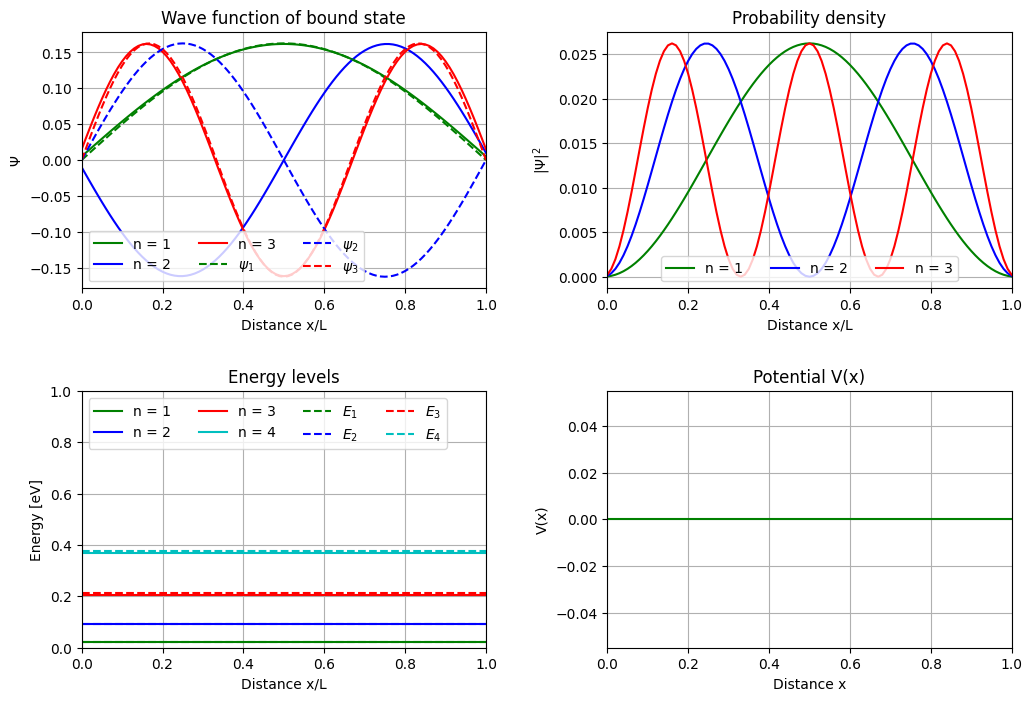

In [12]:
"""
This module is a solution to the traditional 'Particle in a box' problem.
Uses Hartree atomic units:
    Electron mass = 1;
    Elementary charge = 1;
    Reduced Plack's constant = 1;
    Length in terms of Bohr radii.
"""

# import numpy as np
# import matplotlib.pyplot as plt
from scipy.constants import physical_constants

# from schrodinger import schrodinger, plot

def V(x):
    """
    Potential inside the box
    """
    return np.zeros_like(x)

def Psi(x, n, L):
    """
    Wave function - analytical solution
    """
    return np.sqrt(2./L) * np.sin(n*x*np.pi/L)

def E(n, L):
    """
    Energy level- analytical solution. In eV.
    """
    return n ** 2 * np.pi ** 2 / (2. * L ** 2 * physical_constants['electron volt-hartree relationship'][0])

def main():
    N = 100
    box_length = 4e-9 / physical_constants['Bohr radius'][0]  # 4 nm as bohr radii
    x = np.linspace(0, box_length, N+1)  # Burde gå [0, 1] heller

    psi_analytical = np.asarray([Psi(x, n, L=box_length) for n in range(1, 4)])
    analytical_e_levels = E(np.arange(1, 5), L=box_length)

    energy, psi = schrodinger(V(x), box_length/(N+1))
    plot(energy, psi, x/box_length, V(x), psi_analytical, analytical_e_levels)

if __name__ == '__main__':
    main()
    plt.show()


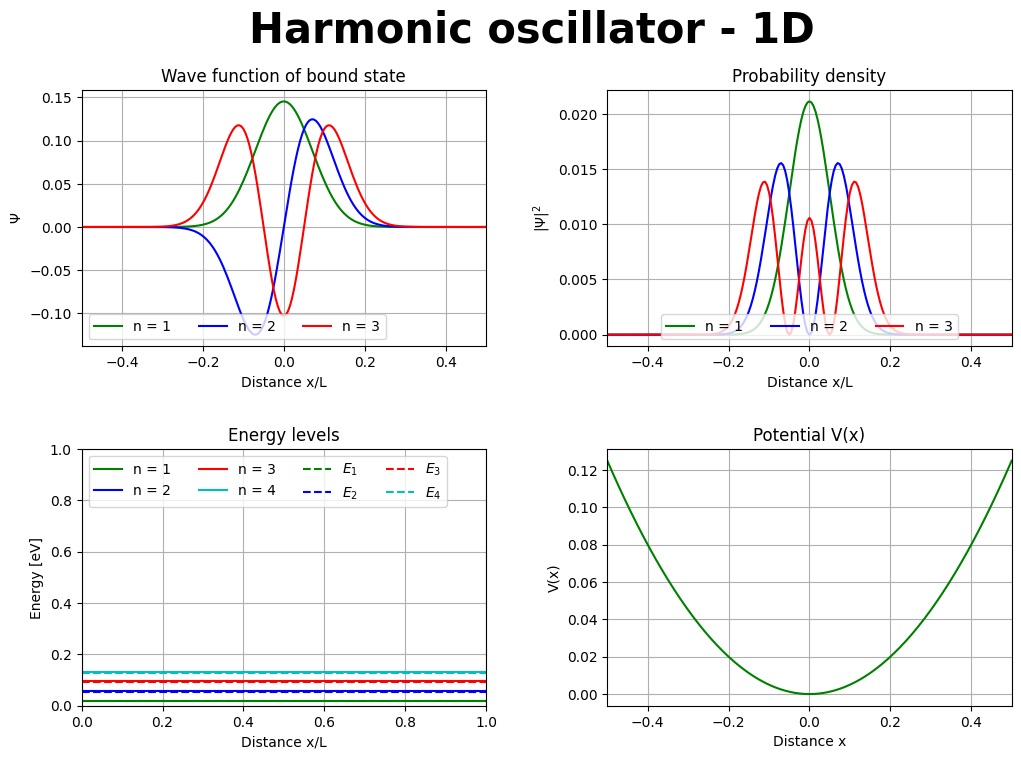

In [13]:
"""
This module is a solution to the 'Harmonic oscillator' problem.
Uses Hartree atomic units:
    Electron mass = 1;
    Elementary charge = 1;
    Reduced Plack's constant = 1;
    Length in terms of Bohr radii.
"""

import numpy as np
import matplotlib.pyplot as plt
# from scipy.constants import physical_constants
from scipy.special import eval_hermite

# from schrodinger import BOHR_RADII, schrodinger, plot

def V(x: float | np.ndarray) -> float | np.ndarray:
    """
    Potential of oscillator
    """
    return x ** 2 / 2.

def Psi(x: float | np.ndarray, n: int) -> float | np.ndarray:
    """
    Wave function - analytical solution
    TODO - Denne er feil:)
    """
    a = 1. / np.sqrt((2 ** n) * np.math.factorial(n))
    b = (1. / np.pi) ** (1. / 4.)
    c = np.exp(- (x ** 2) / 2.)
    return a * b * c * eval_hermite(n, x)
    H_n = eval_hermite(n, x)
    scale_param = np.sqrt(2. ** n * np.math.factorial(n) * np.sqrt(np.pi))
    return H_n * np.exp(-0.5 * x ** 2) / scale_param

def E(n: int) -> float:
    """
    Energy level- analytical solution. In eV.
    """
    return (n + 0.5) * physical_constants['electron volt-hartree relationship'][0]

def main():
    N = 200
    dx = 1e-10 / BOHR_RADII  # 1 Å as bohr radii
    x = np.linspace(-1/2, 1/2, N+1)

    analytical_e_levels = [E(n) for n in range(0, 4)]

    energy, psi = schrodinger(V(x/dx), dx)

    plot(
        energy, psi, x, V(x),
        energy_lvls_analytical=analytical_e_levels,
        title='Harmonic oscillator - 1D'
    )

if __name__ == '__main__':
    main()
    plt.show()


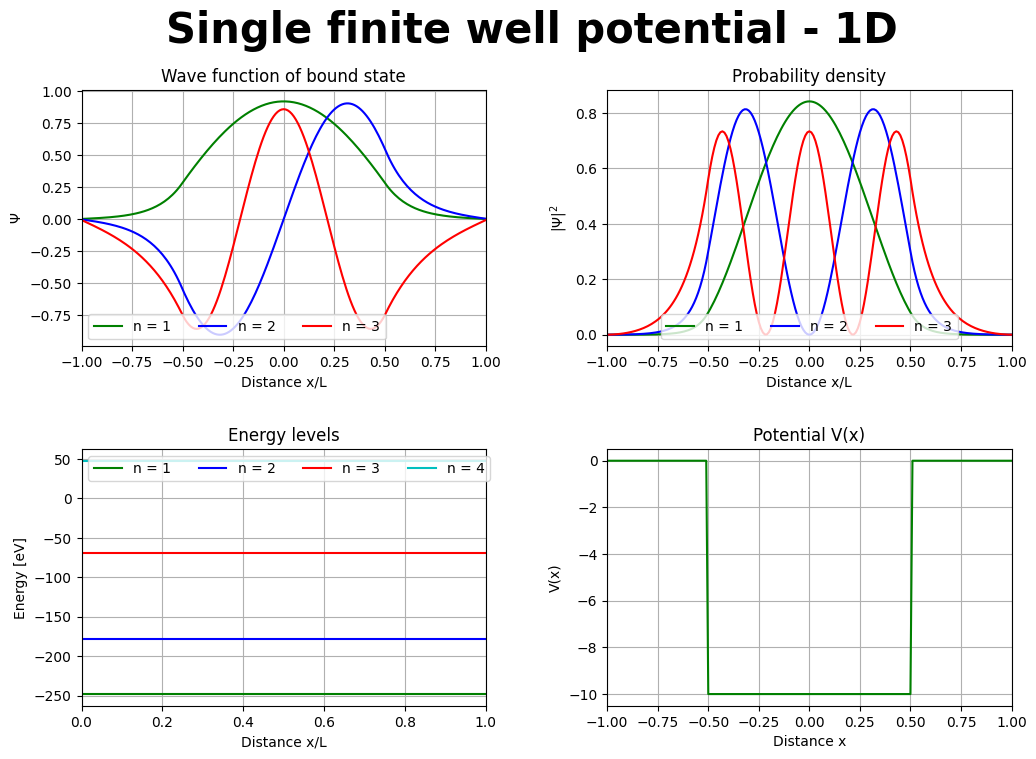

In [14]:
"""
This module is a solution to the 'Signle finite well potential' problem.
Uses Hartree atomic units:
    Electron mass = 1;
    Elementary charge = 1;
    Reduced Plack's constant = 1;
    Length in terms of Bohr radii.
"""

# import numpy as np
# import matplotlib.pyplot as plt

# from schrodinger import BOHR_RADII, schrodinger, plot

def V(x: float | np.ndarray, v0: float = -10.) -> float | np.ndarray:
    """
    Potential inside well.
    V0 for x in [-L/2, L/2].
    """
    return np.where(np.logical_and(x >= -0.5, x <= 0.5), v0, 0)

def main():
    N = 200
    dx = 1e-12 / BOHR_RADII  # 1 picometer as bohr radii
    x = np.linspace(-1, 1, N+1)

    energy, psi = schrodinger(V(x), dx)

    plot(
        energy, psi, x, V(x),
        title='Single finite well potential - 1D'
    )

if __name__ == '__main__':
    main()
    plt.show()


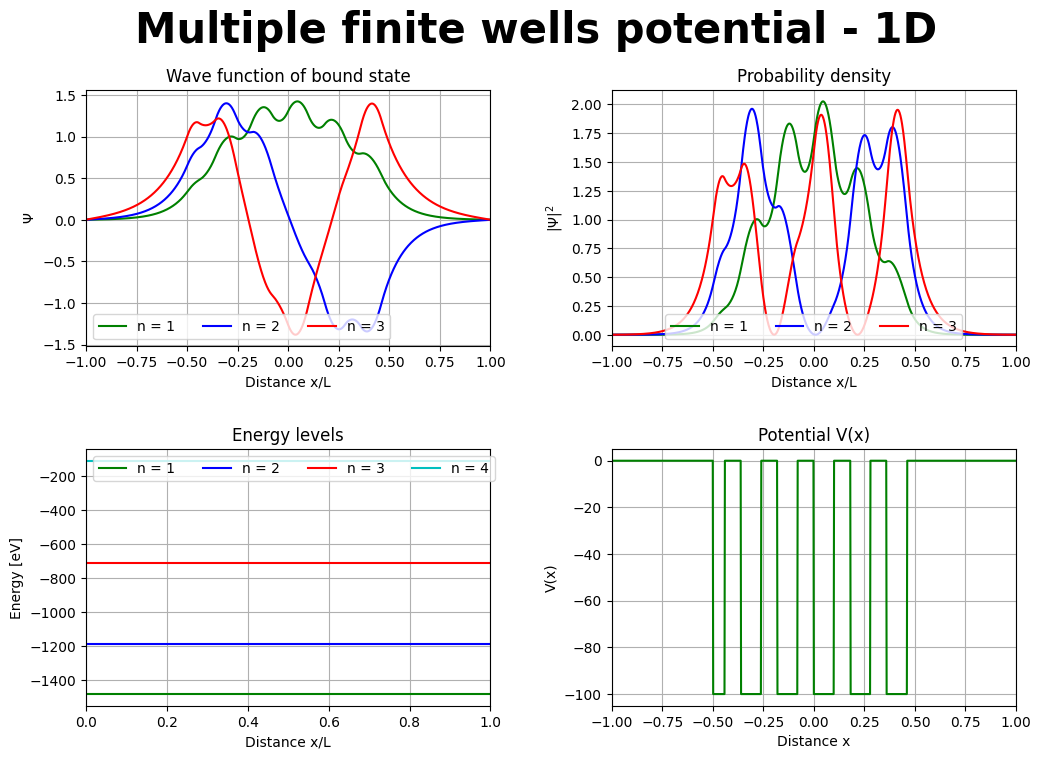

In [15]:
"""
This module is a solution to the 'Multiple finite wells potential' problem.
Uses Hartree atomic units:
    Electron mass = 1;
    Elementary charge = 1;
    Reduced Plack's constant = 1;
    Length in terms of Bohr radii.
"""

# import numpy as np
# import matplotlib.pyplot as plt

# from schrodinger import BOHR_RADII, schrodinger, plot

def V(x: float | np.ndarray, v0: float = -100., cutoff: float = 5.) -> float | np.ndarray:
    """
    Potential inside wells.
    """
    w = 1.  # Box width
    g = .8  # Separation distance
    inside_box = np.where(x/(w+g) - np.floor(x/(w+g)) < w/(w+g), v0, 0)
    return np.where(np.logical_and(x > -cutoff, x < cutoff), inside_box, 0.)

def main():
    N = 1000
    dx = .1e-12 / BOHR_RADII  # .1 picometer as bohr radii
    x = np.linspace(-1, 1, N+1)
    box_scale_factor = 10  # Yields [-10, 10] * dx -> box 2 picometers wide

    energy, psi = schrodinger(V(x * box_scale_factor), dx)

    plot(
        energy, psi, x, V(x * box_scale_factor), 
        title='Multiple finite wells potential - 1D'
    )

if __name__ == '__main__':
    main()
    plt.show()
